In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('figure', figsize=(10,5))
sns.set_theme(style='darkgrid')
sns.set_palette('plasma')

In [3]:
df_dict = pd.read_excel("../raw_data/Customer_Churn_Data_Large.xlsx", sheet_name=None)

In [3]:
# listing names of sheets in the excel file
df_dict.keys()

dict_keys(['Customer_Demographics', 'Transaction_History', 'Customer_Service', 'Online_Activity', 'Churn_Status'])

In [4]:
# listing columns of dataframes
for key, df in df_dict.items():
    print(f"key: ", key)
    print("Columns: ", df.columns.values, "\n")

key:  Customer_Demographics
Columns:  ['CustomerID' 'Age' 'Gender' 'MaritalStatus' 'IncomeLevel'] 

key:  Transaction_History
Columns:  ['CustomerID' 'TransactionID' 'TransactionDate' 'AmountSpent'
 'ProductCategory'] 

key:  Customer_Service
Columns:  ['CustomerID' 'InteractionID' 'InteractionDate' 'InteractionType'
 'ResolutionStatus'] 

key:  Online_Activity
Columns:  ['CustomerID' 'LastLoginDate' 'LoginFrequency' 'ServiceUsage'] 

key:  Churn_Status
Columns:  ['CustomerID' 'ChurnStatus'] 



### Data Selection Rationale
On a quick look at the data, we can see that all the dataframes should be taken for model building since they all provide relevant information.  
The relevant datasets are selected using domain knowledge, a quick thought on the kind of dataset will reveal a possible relation to the customer churn. The rationale is as following: 

- __Customer Demographics__ : The features such as MaritalStatus and IncomeLevel is too important to ignore since it is possible that the customer churn is influenced by a change in marital status or income level or even Age. 
- __Transaction History__ : The transaction dates, spending history could reveal a change in spending which might cause churning. Some customers may have left (or stayed) due to better offers or experiences.
- __Customer Service__ : Frequent customer service interaction should affect the churning. The resolution status of the interaction might have a direct correlation with the churn status.
- __Online activity__ : The frequency of online activity and a very old last login could indicate potential customer churn. 

#### Customer Demographics

In [88]:
df_demographics = df_dict['Customer_Demographics']
df_demographics.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium


In [6]:
df_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   int64 
 1   Age            1000 non-null   int64 
 2   Gender         1000 non-null   object
 3   MaritalStatus  1000 non-null   object
 4   IncomeLevel    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [8]:
# descriptive statistics of the dataset
df_demographics.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,NaN,NaN,NaN,43.267,15.242311,18.0,30.0,43.0,56.0,69.0
Gender,1000,2,F,513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaritalStatus,1000,4,Widowed,276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IncomeLevel,1000,3,High,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The descriptive statistics of the dataset shows a well balanced demographics data.  
- __Gender__ : Males and Females are equally distributed
- __Age__ : Mean age is 43, and the customer base ranges from age 18 to 69.
- __Marital status__ : There are 4 unique values, and the statistics suggest it is roughly equally distributed.
- __Income level__  : Three unique levels for this feature, and equally distributed.

In [ ]:
df_demographics["CustomerID"].nunique(), df_demographics["CustomerID"].count()
# checking for duplicates
# there are no duplicates in the dataset

(1000, np.int64(1000))

In [16]:
# checking for missing values
df_demographics.isna().sum()

CustomerID       0
Age              0
Gender           0
MaritalStatus    0
IncomeLevel      0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

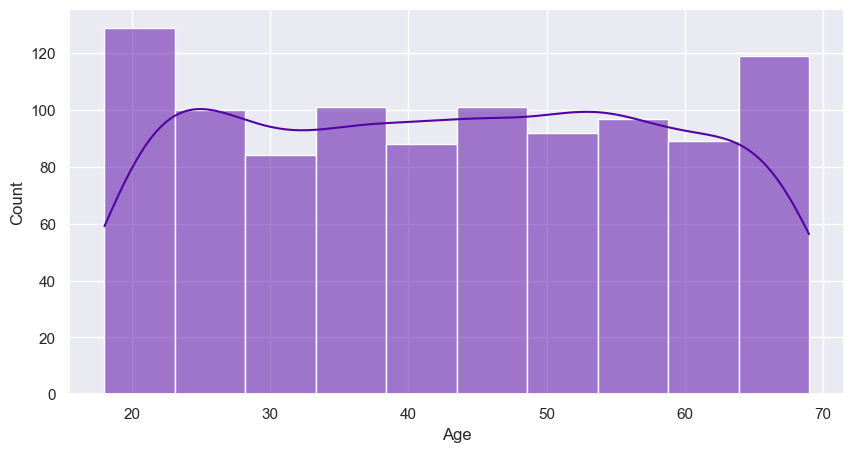

In [46]:
# plotting Age column
sns.histplot(df_demographics['Age'], binwidth=5, kde=True)

The spread of the Age column is uniform, the customer base is uniformly distributed across all age groups.

<Axes: xlabel='Gender', ylabel='count'>

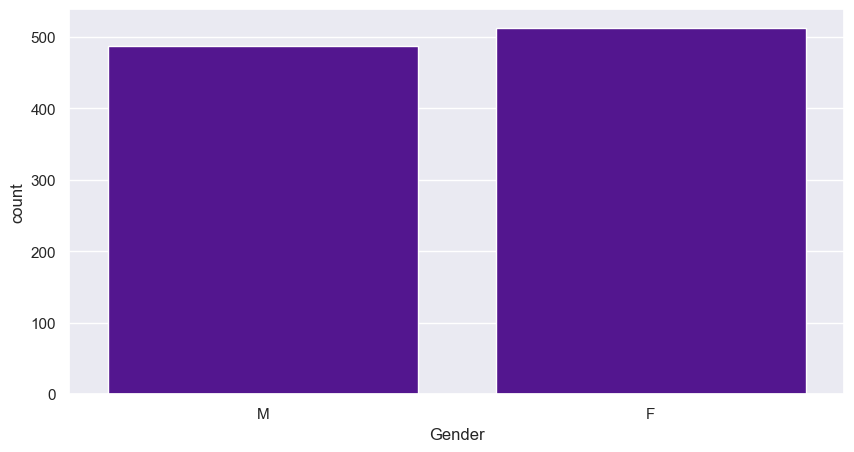

In [50]:
sns.countplot(df_demographics, x="Gender")

<Axes: xlabel='MaritalStatus', ylabel='count'>

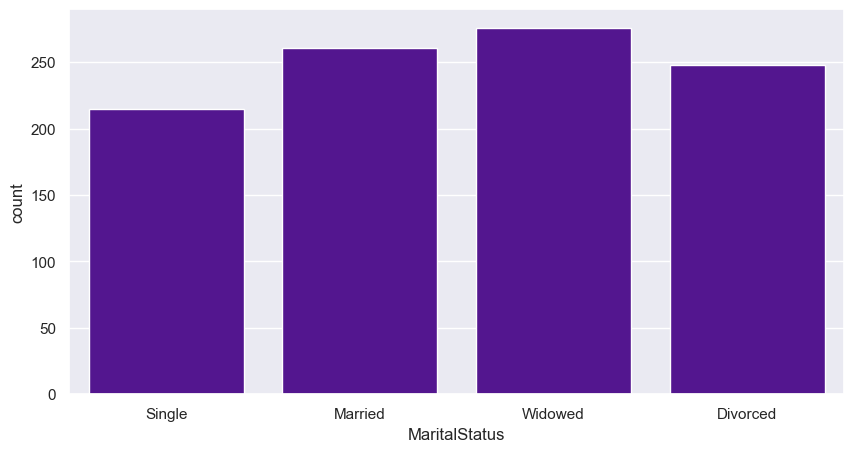

In [51]:
sns.countplot(df_demographics, x='MaritalStatus')

<Axes: xlabel='IncomeLevel', ylabel='count'>

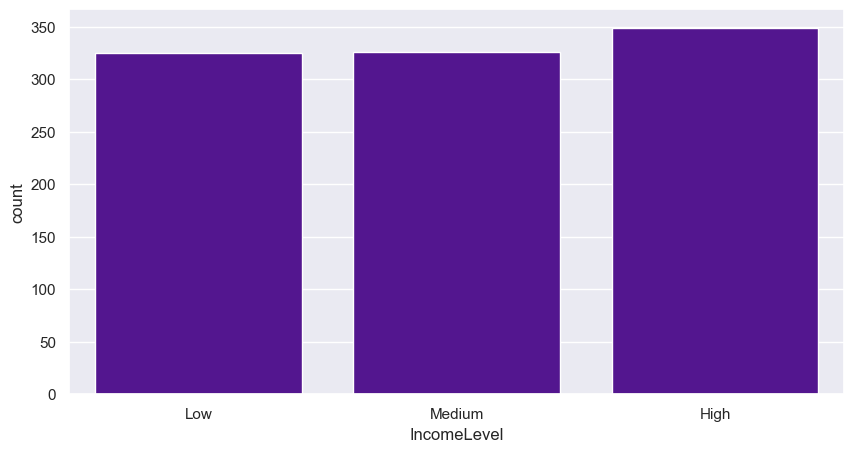

In [52]:
sns.countplot(df_demographics, x='IncomeLevel')

<Axes: xlabel='IncomeLevel', ylabel='Age'>

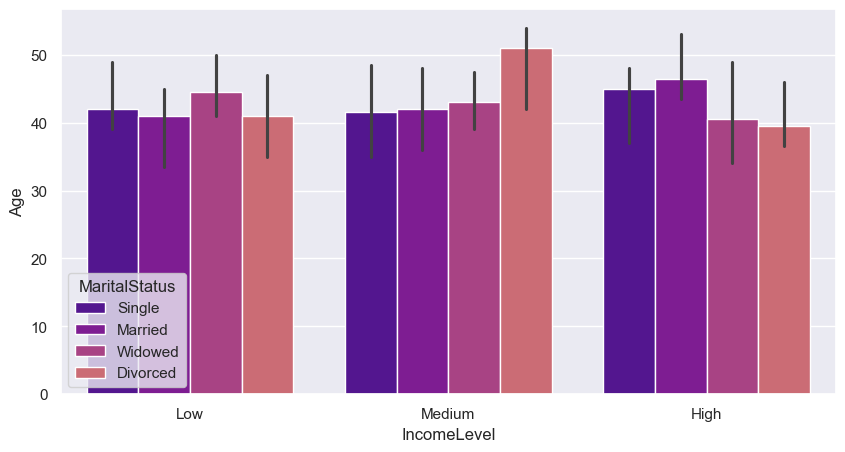

In [ ]:
sns.barplot(df_demographics, x='IncomeLevel', y='Age', hue='MaritalStatus', estimator='median')
# this plot shows the median age of customers in each income level and marital status

The data is equally distributed across categories.

In [ ]:
# converting categorical variable MaritalStatus to numerical through one-hot encoding
df_demographics = pd.concat([df_demographics.drop(columns=['MaritalStatus']), pd.get_dummies(df_demographics[['MaritalStatus']], drop_first=True, dtype=int)],axis=1)
df_demographics.head()

,CustomerID,Age,Gender,IncomeLevel,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed
0,1,62,M,Low,0,1,0
1,2,65,M,Low,1,0,0
2,3,18,M,Low,0,1,0
3,4,21,M,Low,0,0,1
4,5,21,M,Medium,0,0,0


In [90]:
df_demographics = pd.concat([df_demographics.drop(columns=['Gender']), pd.get_dummies(df_demographics[['Gender']], drop_first=True, dtype=int)], axis=1)
df_demographics.head()

,CustomerID,Age,IncomeLevel,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,Gender_M
0,1,62,Low,0,1,0,1
1,2,65,Low,1,0,0,1
2,3,18,Low,0,1,0,1
3,4,21,Low,0,0,1,1
4,5,21,Medium,0,0,0,1


In [97]:
df_demographics['IncomeLevel'] = df_demographics['IncomeLevel'].map({'Low': 0, 'Medium': 1, 'High': 2})
df_demographics.head()

,CustomerID,Age,IncomeLevel,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,Gender_M
0,1,62,0,0,1,0,1
1,2,65,0,1,0,0,1
2,3,18,0,0,1,0,1
3,4,21,0,0,0,1,1
4,5,21,1,0,0,0,1


All categorical features has been converted to numerical values.

In [100]:
df_demographics.to_csv("../processed_data/Customer_Demographics.csv", index=False)

#### Transaction History

In [4]:
df_transaction_history = df_dict['Transaction_History']
df_transaction_history.head()

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
0,1,7194,2022-03-27,416.50,Electronics
1,2,7250,2022-08-08,54.96,Clothing
2,2,9660,2022-07-25,197.50,Electronics
3,2,2998,2022-01-25,101.31,Furniture
4,2,1228,2022-07-24,397.37,Clothing


In [5]:
df_transaction_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       5054 non-null   int64         
 1   TransactionID    5054 non-null   int64         
 2   TransactionDate  5054 non-null   datetime64[ns]
 3   AmountSpent      5054 non-null   float64       
 4   ProductCategory  5054 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 197.6+ KB


The dataset is clean without any null values.  
There are multiple transaction histories for a given customer, so feature engineering is required to aggregate multiple histories and create relevant features.

In [6]:
df_transaction_history.duplicated().sum()
# checking for duplicates
# there are no duplicates in the dataset

np.int64(0)

In [7]:
df_transaction_history[['AmountSpent', 'ProductCategory']].describe(include='all').T
# the features for which summary statistics are relevant are AmountSpent and ProductCategory
# descriptive statistics of the dataset

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AmountSpent,5054.0,NaN,NaN,NaN,250.707351,142.250838,5.18,127.105,250.525,373.4125,499.86
ProductCategory,5054,5,Books,1041,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The amount spent ranges from 5 to 499 and is uniformly distributed.
The Product category is also uniformly distributed.

TransactionID is a redundant column. It represents an id to refer to the transaction which is irrelevant to customer churn, so it can be dropped. 

In [8]:
df_transaction_history.drop(columns=['TransactionID'], inplace=True)
# dropping TransactionID column as it is not relevant for analysis

In [9]:
df_transaction_history.head()

,CustomerID,TransactionDate,AmountSpent,ProductCategory
0,1,2022-03-27,416.50,Electronics
1,2,2022-08-08,54.96,Clothing
2,2,2022-07-25,197.50,Electronics
3,2,2022-01-25,101.31,Furniture
4,2,2022-07-24,397.37,Clothing


<Axes: xlabel='TransactionDate', ylabel='Count'>

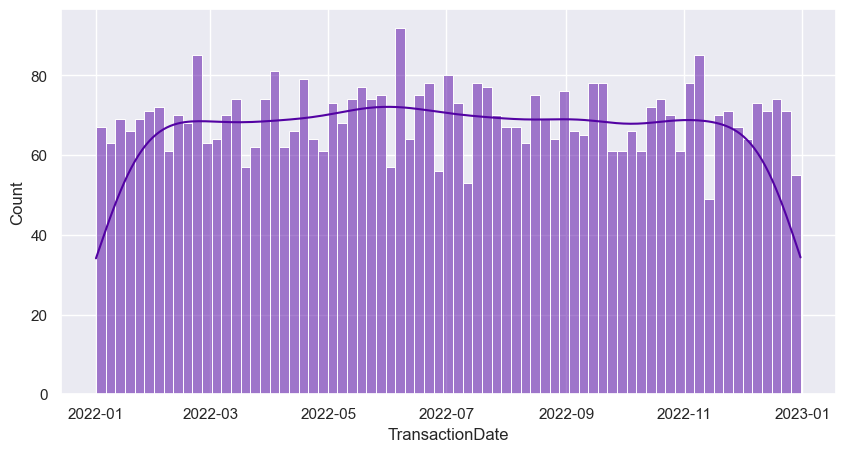

In [10]:
# plotting the TransactionDate column
sns.histplot(df_transaction_history['TransactionDate'], binwidth=5, kde=True)

<Axes: xlabel='AmountSpent', ylabel='Count'>

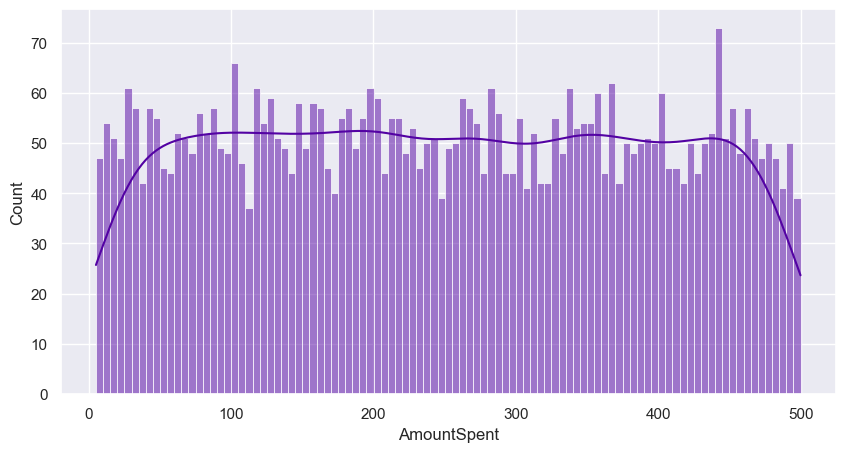

In [11]:
# plotting AmountSpent column
sns.histplot(df_transaction_history['AmountSpent'], binwidth=5, kde=True)

The Customer transactions and Amount spent are roughly uniformly distributed. 

<Axes: xlabel='ProductCategory', ylabel='count'>

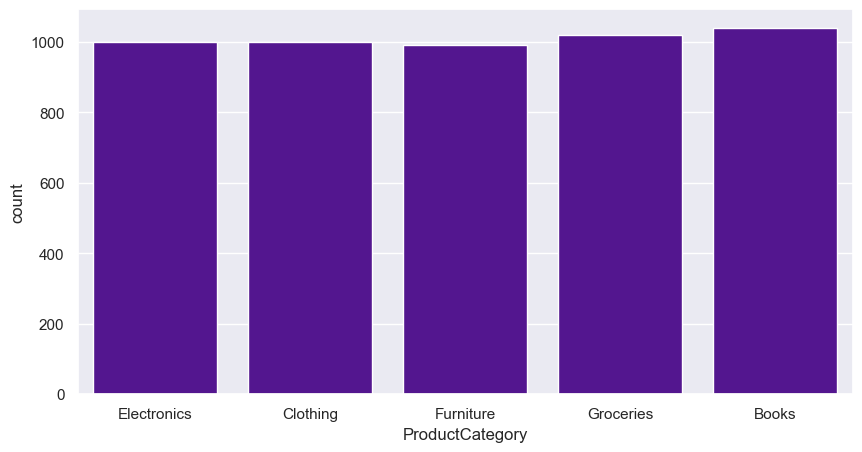

In [12]:
# plotting ProductCategory column
sns.countplot(df_transaction_history, x='ProductCategory')
# this plot shows the number of transactions in each product category

<Axes: xlabel='ProductCategory', ylabel='AmountSpent'>

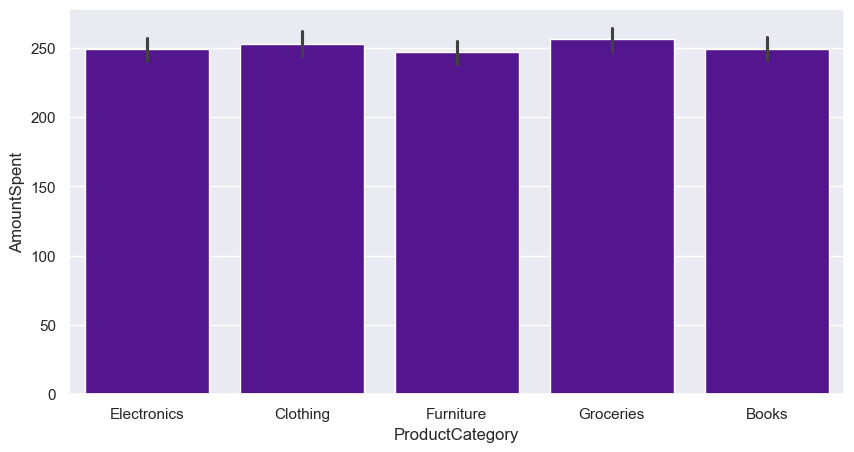

In [13]:
# mean amount spent in each product category
sns.barplot(df_transaction_history, x='ProductCategory', y='AmountSpent', estimator='mean')
# this plot shows the mean amount spent in each product category

In [14]:
df_transaction_history_agg = df_transaction_history.groupby('CustomerID', as_index=False).agg(
    {'TransactionDate': 'size', 'AmountSpent': 'sum'}).rename(
    columns={'TransactionDate': 'TransactionCount', 'AmountSpent': 'TotalAmountSpent'})
# this shows the number of transactions and total amount spent for each customer

df_transaction_history_agg

,CustomerID,TransactionCount,TotalAmountSpent
0,1,1,416.50
1,2,7,1547.42
2,3,6,1702.98
3,4,5,917.29
4,5,8,2001.49
...,...,...,...
995,996,1,227.25
996,997,2,419.82
997,998,1,252.15
998,999,9,2393.26


In [15]:
# finding number of days from earliest transaction date and latest transaction date to present date
df_transaction_history['Days_since_transaction'] = (pd.Timestamp.today()-df_transaction_history['TransactionDate']).dt.days
df_transaction_history

,CustomerID,TransactionDate,AmountSpent,ProductCategory,Days_since_transaction
0,1,2022-03-27,416.50,Electronics,1119
1,2,2022-08-08,54.96,Clothing,985
2,2,2022-07-25,197.50,Electronics,999
3,2,2022-01-25,101.31,Furniture,1180
4,2,2022-07-24,397.37,Clothing,1000
...,...,...,...,...,...
5049,1000,2022-09-08,232.06,Groceries,954
5050,1000,2022-12-13,324.98,Books,858
5051,1000,2022-06-15,375.34,Groceries,1039
5052,1000,2022-04-08,166.73,Books,1107


In [23]:
# adding columns days since first transaction and days since last transaction to the aggregated dataframe
df_days = df_transaction_history.groupby('CustomerID', as_index=False)['Days_since_transaction'].agg(['min', 'max'])
df_days.rename(columns={'min': 'Days_since_first_transaction', 'max': 'Days_since_last_transaction'}, inplace=True)

df_transaction_history_agg = df_transaction_history_agg.merge(df_days, on='CustomerID', how='left')
# merging the aggregated dataframe with the days dataframe on CustomerID

df_transaction_history_agg

,CustomerID,TransactionCount,TotalAmountSpent,Days_since_first_transaction,Days_since_last_transaction
0,1,1,416.50,1119,1119
1,2,7,1547.42,882,1196
2,3,6,1702.98,924,1163
3,4,5,917.29,844,1063
4,5,8,2001.49,850,1153
...,...,...,...,...,...
995,996,1,227.25,1000,1000
996,997,2,419.82,907,987
997,998,1,252.15,944,944
998,999,9,2393.26,864,1185


In [101]:
# creating the counts of each product category for each customer
product_category_df = df_transaction_history.groupby(['CustomerID', 'ProductCategory']).size().unstack(fill_value=0).reset_index().rename_axis(None, axis=1)
product_category_df.head()

,CustomerID,Books,Clothing,Electronics,Furniture,Groceries
0,1,0,0,1,0,0
1,2,0,2,3,1,1
2,3,1,1,0,2,2
3,4,0,1,2,1,1
4,5,0,0,3,2,3


In [103]:
# merging the product category dataframe with the aggregated dataframe on CustomerID
df_transaction_history_agg = df_transaction_history_agg.merge(product_category_df, on='CustomerID', how='left')
df_transaction_history_agg.head()

,CustomerID,TransactionCount,TotalAmountSpent,Days_since_first_transaction,Days_since_last_transaction,Books,Clothing,Electronics,Furniture,Groceries
0,1,1,416.50,1119,1119,0,0,1,0,0
1,2,7,1547.42,882,1196,0,2,3,1,1
2,3,6,1702.98,924,1163,1,1,0,2,2
3,4,5,917.29,844,1063,0,1,2,1,1
4,5,8,2001.49,850,1153,0,0,3,2,3


The categorical features has been converted to numeric values.

In [104]:
df_transaction_history_agg.to_csv("../processed_data/Transaction_History.csv", index=False)